## SimpleGrad
#### (Simple Gradient - Neural Network Perceptron - with Back Propagation)
---

Process of making a simple neural network using Stochastic Gradient Descent similar to Pytorch API for simple classification problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### nnValue class

In [2]:
class nnValue:

    def __init__(self ,data, children = () , op = None , label = None):
        self.data = data
        self.children = children
        self.op = op
        self.label = label

    def __add__(self, other):
        if isinstance(other, (int, float)):
            other = nnValue(other)
        return nnValue(self.data + other.data , (self, other) , op = '+')
    
    def __mul__(self, other):
        if isinstance(other, (int, float)):
            other = nnValue(other)
        return nnValue(self.data * other.data , (self, other) , op = '*')
    
    def __pow__(self, other):
        if isinstance(other, (int, float)):
            other = nnValue(other)
        return nnValue(self.data ** other.data , (self, other) , op = '**')
    
    def __sub__(self, other):
        # return self + (-1 * other)
        return self + (- other)
    
    def __neg__(self):
        return nnValue(-self.data , (self,) , op = '-')

    def __truediv__(self, other):
        # return nnValue(self.data / other.data , (self, other) , op = '/')
        return self * other ** nnValue(-1)
    

    
    def __repr__(self):
        return f'nnValue(data = {self.data.__repr__()} , op = {self.op.__repr__()} , label = {self.label.__repr__()})'
    
    def __radd__(self, other):
        return self + other
    
    def __rmul__(self, other):
        return self * other
    
    def __rsub__(self, other):
        return (-self) + other
    
    def __rtruediv__(self, other):
        return nnValue(other) / self
    
    def __rpow__(self, other):
        return nnValue(other) ** self
    


    def exp(self):
        return nnValue(np.exp(self.data) , (self,) , op = 'exp')

    def tanh(self):
        # exp_self = self.exp()
        # res  = (exp_self - (-exp_self)) / (exp_self + (-exp_self))
        # return nnValue(res.data , (self,) , op = 'tanh')
        return nnValue(np.tanh(self.data) , (self,) , op = 'tanh')
    
    def sigmoid(self):
        return nnValue(1 / (1 + np.exp(-self.data)) , (self,) , op = 'sigm')
    
    def relu(self):
        return nnValue(np.maximum(0, self.data) , (self,) , op = 'relu')
    
    # def leaky_relu(self):
    #     return nnValue(np.maximum(0.01 * self.data, self.data) , (self,) , op = 'leaky_relu')


a = nnValue(1, label = 'a')
b = nnValue(2.5 , label = 'b')
c = nnValue(3.14 , label = 'c')
c
d = a + b ; d.label = 'd'
f'{d = }'
e = b + c ; e.label = 'e'
f'{e = }'
f = d * e ; f.label = 'f'
f'{f = }'
g = f ** nnValue(2)
f'{g = }' ; g.label = 'g'

nnValue(data = 3.14 , op = None , label = 'c')

"d = nnValue(data = 3.5 , op = '+' , label = 'd')"

"e = nnValue(data = 5.640000000000001 , op = '+' , label = 'e')"

"f = nnValue(data = 19.740000000000002 , op = '*' , label = 'f')"

"g = nnValue(data = 389.6676000000001 , op = '**' , label = None)"

In [3]:
h = g + 1.77 ; h.label = 'h'
f'{h = }' 
i = h / 2 ; i.label = 'i'
f'{i = }' 
j = i - 1 ; j.label = 'j'
f'{j = }' 


"h = nnValue(data = 391.4376000000001 , op = '+' , label = 'h')"

"i = nnValue(data = 195.71880000000004 , op = '*' , label = 'i')"

"j = nnValue(data = 194.71880000000004 , op = '+' , label = 'j')"

In [4]:
k = j ** 2 ; k.label = 'k'
f'{k = }' 
l = k + 1 ; l.label = 'l'
f'{l = }' 
m = l / 2**16 ; m.label = 'm'
f'{m = }'


"k = nnValue(data = 37915.41107344002 , op = '**' , label = 'k')"

"l = nnValue(data = 37916.41107344002 , op = '+' , label = 'l')"

"m = nnValue(data = 0.5785585185766604 , op = '*' , label = 'm')"

In [5]:
n = m.exp() ; n.label = 'n'
f'{n = }'
o = m.tanh() ; o.label = 'o'
f'{o = }'
p = m.sigmoid() ; p.label = 'p'
f'{p = }'

"n = nnValue(data = 1.7834657442161752 , op = 'exp' , label = 'n')"

"o = nnValue(data = 0.5216169417167084 , op = 'tanh' , label = 'o')"

"p = nnValue(data = 0.640735654075168 , op = 'sigm' , label = 'p')"

In [6]:
d.data
d.label
d.op
d.children

3.5

'd'

'+'

(nnValue(data = 1 , op = None , label = 'a'),
 nnValue(data = 2.5 , op = None , label = 'b'))

### extending nnValue class to neuron

In [75]:
class neuronValue(nnValue):
    def __init__(self, data, children = () , op = None , label = None , grad = 0.0):
        self.grad = grad
        self._backward = lambda : None
        super().__init__(data, children, op, label)
        self._prev = set(self.children)

    def zero_grad(self):
        self.grad = 0.0

    def __repr__(self):
        return f'neuronValue(data = {self.data.__repr__()} , op = {self.op.__repr__()} , label = {self.label.__repr__()} , grad = {self.grad.__repr__()})'
    
    def __add__(self, other):
        if isinstance(other, (int, float)):
            other = neuronValue(other)
        res = neuronValue(self.data + other.data , (self, other) , op = '+')
        def _backward():
            self.grad += res.grad
            other.grad += res.grad
        res._backward = _backward

        return res
    
    def __mul__(self, other):
        if isinstance(other, (int, float)):
            other = neuronValue(other)
        res = neuronValue(self.data * other.data , (self, other) , op = '*')
        def _backward():
            self.grad += other.data * res.grad
            other.grad += self.data * res.grad
        res._backward = _backward

        return res
    
    def __pow__(self, other):
        if isinstance(other, (int, float)):
            other = neuronValue(other)
        res = neuronValue(self.data ** other.data , (self, other) , op = '**')
        def _backward():
            self.grad += other.data * self.data ** (other.data - 1) * res.grad
            # other.grad += self.data ** other.data * np.log(self.data) * res.grad
        res._backward = _backward

        return res
    
    def tanh(self):
        res = neuronValue(np.tanh(self.data) , (self,) , op = 'tanh')
        def _backward():
            self.grad += (1 - res.data ** 2) * res.grad
        res._backward = _backward
        return res
    
    def sigmoid(self):
        res = neuronValue(1 / (1 + np.exp(-self.data)) , (self,) , op = 'sigm')
        def _backward():
            self.grad += res.data * (1 - res.data) * res.grad
        res._backward = _backward
        return res
    
    def relu(self):
        res = neuronValue(np.maximum(0, self.data) , (self,) , op = 'relu')
        def _backward():
            self.grad += (self.data > 0) * res.grad
        res._backward = _backward
        return res
    
    def backward(self):
        toposort = []
        visited = set()
        def dfs(node):
            if node in visited:
                return
            visited.add(node)
            for child in node._prev:
                dfs(child)
            toposort.append(node)
        dfs(self)

        print(toposort)
        self.grad = 1.0
        print(self)
        for node in reversed(toposort):
            node._backward()
    
    def __radd__(self, other):
        return self + other
    
    def __rmul__(self, other):
        return self * other
    
    def __rsub__(self, other):
        return (-self) + other
    
    def __rtruediv__(self, other):
        return neuronValue(other) / self
    
    def __rpow__(self, other):
        return neuronValue(other) ** self
    
    def __neg__(self):
        return neuronValue(-self.data , (self,) , op = '-')
    
    def __sub__(self, other):
        return self + (- other)
    
    def __truediv__(self, other):
        return self * other ** neuronValue(-1)
    

In [76]:

a = neuronValue(1.2, label = 'a')
b = neuronValue(0.5 , label = 'b')
c = neuronValue(0.414 , label = 'c')
d = a + b ; d.label = 'd'
e = b + c ; e.label = 'e'
f = d + e ; f.label = 'f'
r = f.tanh() ; r.label = 'r'

In [77]:
r
f
d,e


neuronValue(data = 0.989328757006335 , op = 'tanh' , label = 'r' , grad = 0.0)

neuronValue(data = 2.614 , op = '+' , label = 'f' , grad = 0.0)

(neuronValue(data = 1.7 , op = '+' , label = 'd' , grad = 0.0),
 neuronValue(data = 0.9139999999999999 , op = '+' , label = 'e' , grad = 0.0))

In [78]:
r.backward()

[neuronValue(data = 0.5 , op = None , label = 'b' , grad = 0.0), neuronValue(data = 0.414 , op = None , label = 'c' , grad = 0.0), neuronValue(data = 0.9139999999999999 , op = '+' , label = 'e' , grad = 0.0), neuronValue(data = 1.2 , op = None , label = 'a' , grad = 0.0), neuronValue(data = 1.7 , op = '+' , label = 'd' , grad = 0.0), neuronValue(data = 2.614 , op = '+' , label = 'f' , grad = 0.0), neuronValue(data = 0.989328757006335 , op = 'tanh' , label = 'r' , grad = 0.0)]
neuronValue(data = 0.989328757006335 , op = 'tanh' , label = 'r' , grad = 1.0)


In [79]:
r
f
d,e

neuronValue(data = 0.989328757006335 , op = 'tanh' , label = 'r' , grad = 1.0)

neuronValue(data = 2.614 , op = '+' , label = 'f' , grad = 0.02122861056030001)

(neuronValue(data = 1.7 , op = '+' , label = 'd' , grad = 0.02122861056030001),
 neuronValue(data = 0.9139999999999999 , op = '+' , label = 'e' , grad = 0.02122861056030001))

### Graph Viz

In [80]:
from graphviz import Digraph

# def trace(root):
#   return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  # nodes, edges = trace(root)
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n.op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n.op, label = n.op)
      # and connect this node to it
      dot.edge(uid + n.op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2.op)

  return dot


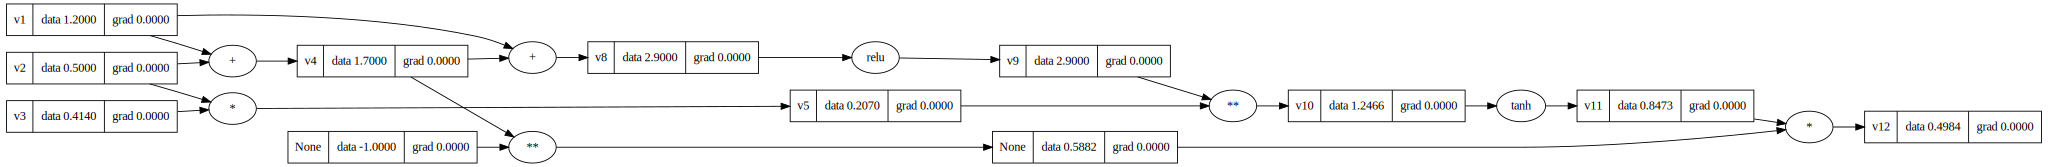

In [81]:
v1 = neuronValue(1.2, label = 'v1')
v2 = neuronValue(0.5 , label = 'v2')
v3 = neuronValue(0.414 , label = 'v3')
v4 = v1 + v2 ; v4.label = 'v4'
v5 = v2 * v3 ; v5.label = 'v5'
v6 = v4 + v5 ; v6.label = 'v6'
v7 = v6.sigmoid() ; v7.label = 'v7'
v8 = v4 + v1 ; v8.label = 'v8'
v9 = v8.relu() ; v9.label = 'v9'
v10 = v9 ** v5 ; v10.label = 'v10' 
v11 = v10.tanh() ; v11.label = 'v11'
v12 = v11 / v4 ; v12.label = 'v12'
draw_dot(v12)

#### Visualize first update

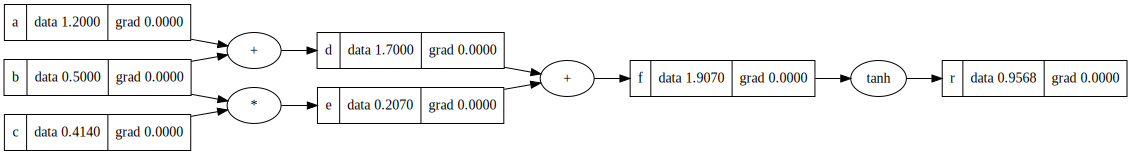

In [82]:
a = neuronValue(1.2, label = 'a')
b = neuronValue(0.5 , label = 'b')
c = neuronValue(0.414 , label = 'c')
d = a + b ; d.label = 'd'
e = b * c ; e.label = 'e'
f = d + e ; f.label = 'f'
r = f.tanh() ; r.label = 'r'
# before update
draw_dot(r)

[neuronValue(data = 1.2 , op = None , label = 'a' , grad = 0.0), neuronValue(data = 0.5 , op = None , label = 'b' , grad = 0.0), neuronValue(data = 1.7 , op = '+' , label = 'd' , grad = 0.0), neuronValue(data = 0.414 , op = None , label = 'c' , grad = 0.0), neuronValue(data = 0.207 , op = '*' , label = 'e' , grad = 0.0), neuronValue(data = 1.907 , op = '+' , label = 'f' , grad = 0.0), neuronValue(data = 0.9568327332997354 , op = 'tanh' , label = 'r' , grad = 0.0)]
neuronValue(data = 0.9568327332997354 , op = 'tanh' , label = 'r' , grad = 1.0)


neuronValue(data = 0.9568327332997354 , op = 'tanh' , label = 'r' , grad = 1.0)

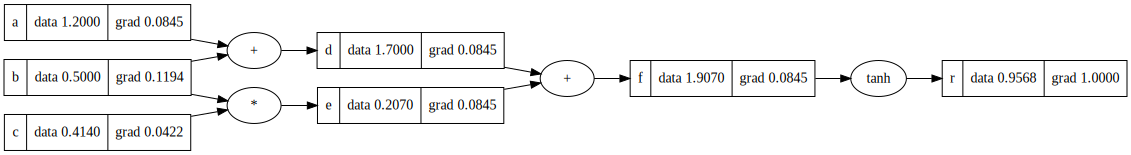

In [83]:
# after backward grad update
r.backward()
r

draw_dot(r)


In [84]:
x1 = neuronValue(2.0, label='x1')
x2 = neuronValue(0.0, label='x2')
# weights w1,w2
w1 = neuronValue(-3.0, label='w1')
w2 = neuronValue(1.0, label='w2')
# bias of the neuron
b = neuronValue(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.backward()

[neuronValue(data = 2.0 , op = None , label = 'x1' , grad = 0.0), neuronValue(data = -3.0 , op = None , label = 'w1' , grad = 0.0), neuronValue(data = -6.0 , op = '*' , label = 'x1*w1' , grad = 0.0), neuronValue(data = 0.0 , op = None , label = 'x2' , grad = 0.0), neuronValue(data = 1.0 , op = None , label = 'w2' , grad = 0.0), neuronValue(data = 0.0 , op = '*' , label = 'x2*w2' , grad = 0.0), neuronValue(data = -6.0 , op = '+' , label = 'x1*w1 + x2*w2' , grad = 0.0), neuronValue(data = 6.881373587019543 , op = None , label = 'b' , grad = 0.0), neuronValue(data = 0.8813735870195432 , op = '+' , label = 'n' , grad = 0.0), neuronValue(data = 0.7071067811865476 , op = 'tanh' , label = 'o' , grad = 0.0)]
neuronValue(data = 0.7071067811865476 , op = 'tanh' , label = 'o' , grad = 1.0)


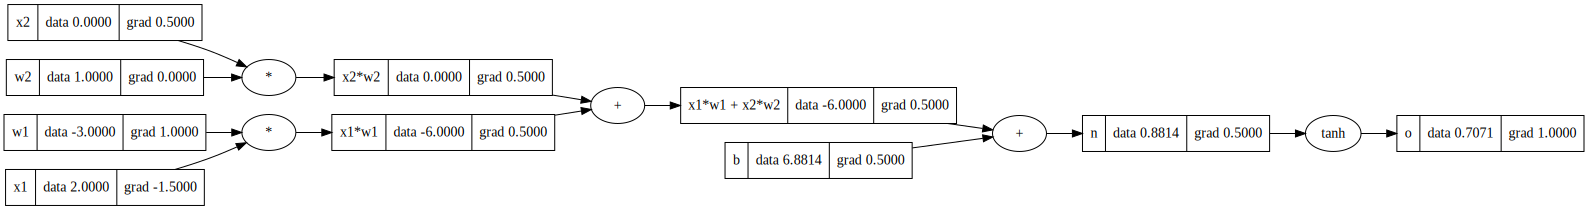

In [85]:
draw_dot(o)

### Combining to creating Neuron 

In [86]:
class Neuron:
    def __init__(self , n_inputs):
        self.w = [ neuronValue(i) for i in  np.random.uniform(-1, 1, n_inputs).tolist() ]
        self.b = neuronValue(np.random.uniform(-1, 1).real)
    
    def forward(self, inputs):
        # res = np.dot(inputs, self.w) + self.b
        res = sum([x * w for x, w in zip(inputs, self.w)]) + self.b
        return res.tanh()
    
    def __repr__(self):
        return f'Neuron(w = {self.w.__repr__()} , b = {self.b.__repr__()})'
    
    def __call__(self, inputs):
        return self.forward(inputs)
    
    def parameters(self):
        return self.w + [self.b]

n1 = Neuron(3)
a = neuronValue(1.2, label = 'a')
b = neuronValue(0.5 , label = 'b')
c = neuronValue(0.414 , label = 'c')
inps = [a, b, c]

n1.forward(inps)

neuronValue(data = -0.934366980226773 , op = 'tanh' , label = None , grad = 0.0)

In [87]:
n2 = Neuron(3)
inps2 = [ neuronValue(0.7, label = 'd') , neuronValue(0.6 , label = 'e') , neuronValue(0.214 , label = 'f')]
n2.forward(inps2)

neuronValue(data = 0.06543559963514424 , op = 'tanh' , label = None , grad = 0.0)

In [88]:
n1.parameters() , n2.parameters()

([neuronValue(data = -0.6524832399124425 , op = None , label = None , grad = 0.0),
  neuronValue(data = 0.12773379571824828 , op = None , label = None , grad = 0.0),
  neuronValue(data = -0.06770012799952108 , op = None , label = None , grad = 0.0),
  neuronValue(data = -0.9445874021854619 , op = None , label = None , grad = 0.0)],
 [neuronValue(data = -0.5870692284485055 , op = None , label = None , grad = 0.0),
  neuronValue(data = -0.8468868714807944 , op = None , label = None , grad = 0.0),
  neuronValue(data = 0.9972728110087075 , op = None , label = None , grad = 0.0),
  neuronValue(data = 0.7711934359930066 , op = None , label = None , grad = 0.0)])

### Combining Neurons to creating Layer

In [89]:
class Layer:
    def __init__(self , n_inputs , n_output):
        self.neurons = [Neuron(n_inputs) for _ in range(n_output)]
    
    def forward(self, inputs):
        return [neuron(inputs) for neuron in self.neurons]

    def __call__(self, inputs):
        return self.forward(inputs)

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]
    
    def __repr__(self):
        return f'Layer(neurons = {self.neurons.__repr__()})'

l1 = Layer(3,2)
l1

Layer(neurons = [Neuron(w = [neuronValue(data = 0.011603177422665922 , op = None , label = None , grad = 0.0), neuronValue(data = 0.23588501281745144 , op = None , label = None , grad = 0.0), neuronValue(data = 0.9905422177874617 , op = None , label = None , grad = 0.0)] , b = neuronValue(data = -0.6303010689874629 , op = None , label = None , grad = 0.0)), Neuron(w = [neuronValue(data = -0.6199696116281561 , op = None , label = None , grad = 0.0), neuronValue(data = 0.8965124389247352 , op = None , label = None , grad = 0.0), neuronValue(data = -0.5857121483089942 , op = None , label = None , grad = 0.0)] , b = neuronValue(data = -0.2965226647294643 , op = None , label = None , grad = 0.0))])

In [90]:
l1(inps)

[neuronValue(data = -0.08812110635822054 , op = 'tanh' , label = None , grad = 0.0),
 neuronValue(data = -0.6829995190203549 , op = 'tanh' , label = None , grad = 0.0)]

In [91]:
l1.parameters() 

[neuronValue(data = 0.011603177422665922 , op = None , label = None , grad = 0.0),
 neuronValue(data = 0.23588501281745144 , op = None , label = None , grad = 0.0),
 neuronValue(data = 0.9905422177874617 , op = None , label = None , grad = 0.0),
 neuronValue(data = -0.6303010689874629 , op = None , label = None , grad = 0.0),
 neuronValue(data = -0.6199696116281561 , op = None , label = None , grad = 0.0),
 neuronValue(data = 0.8965124389247352 , op = None , label = None , grad = 0.0),
 neuronValue(data = -0.5857121483089942 , op = None , label = None , grad = 0.0),
 neuronValue(data = -0.2965226647294643 , op = None , label = None , grad = 0.0)]

In [92]:
class MultiLayer:
    def __init__(self ,n_inputs, n_outputs):
        self.layers = [Layer(n_inputs, n_outputs[0])]
        for i in range(1, len(n_outputs)):
            # from second layer No of inputs depends on the No of outputs of the previous layer
            self.layers.append(Layer(n_outputs[i-1], n_outputs[i]))
    
    def forward(self, inputs):
        for layer in self.layers:
            inputs = layer(inputs)
        return inputs

    def __call__(self, inputs):
        return self.forward(inputs)
    
    def parameters(self):
        return np.concatenate([layer.parameters() for layer in self.layers])
    
    def __repr__(self):
        return f'MultiLayer(layers = {self.layers.__repr__()})'
    
mlp1 = MultiLayer(3, [2,2,1])

In [93]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

my_nn = MultiLayer(3 ,[4,4,1])

In [94]:
my_nn( xs[0] ) 

[neuronValue(data = -0.3095420619124755 , op = 'tanh' , label = None , grad = 0.0)]

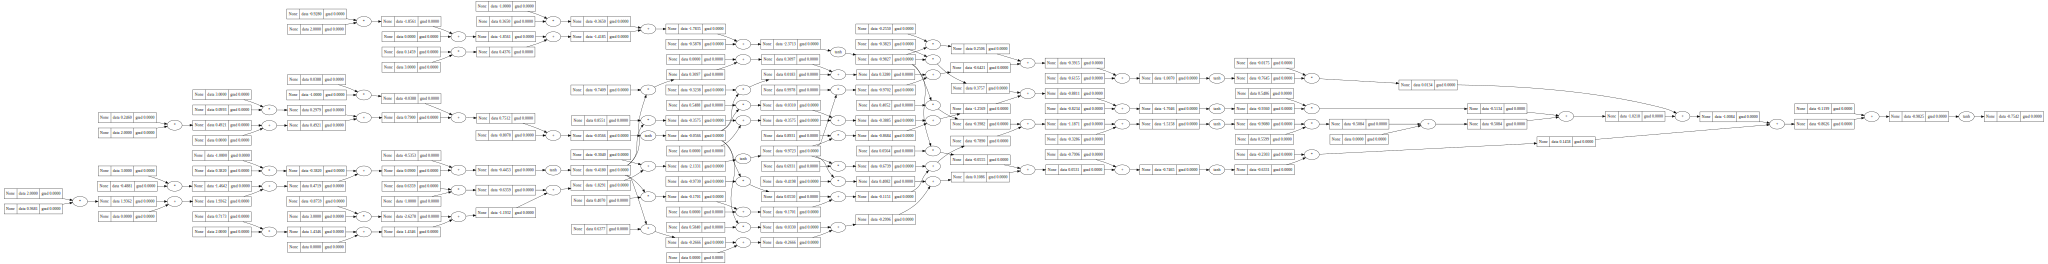

[neuronValue(data = -0.11993355688688712 , op = None , label = None , grad = 0.0), neuronValue(data = 0.8931052821458447 , op = None , label = None , grad = 0.0), neuronValue(data = 0 , op = None , label = None , grad = 0.0), neuronValue(data = 2.0 , op = None , label = None , grad = 0.0), neuronValue(data = 0.7173243555847779 , op = None , label = None , grad = 0.0), neuronValue(data = 1.4346487111695558 , op = '*' , label = None , grad = 0.0), neuronValue(data = 1.4346487111695558 , op = '+' , label = None , grad = 0.0), neuronValue(data = -0.8759362219994689 , op = None , label = None , grad = 0.0), neuronValue(data = 3.0 , op = None , label = None , grad = 0.0), neuronValue(data = -2.6278086659984066 , op = '*' , label = None , grad = 0.0), neuronValue(data = -1.1931599548288507 , op = '+' , label = None , grad = 0.0), neuronValue(data = -1.0 , op = None , label = None , grad = 0.0), neuronValue(data = 0.6359375930959754 , op = None , label = None , grad = 0.0), neuronValue(data = 

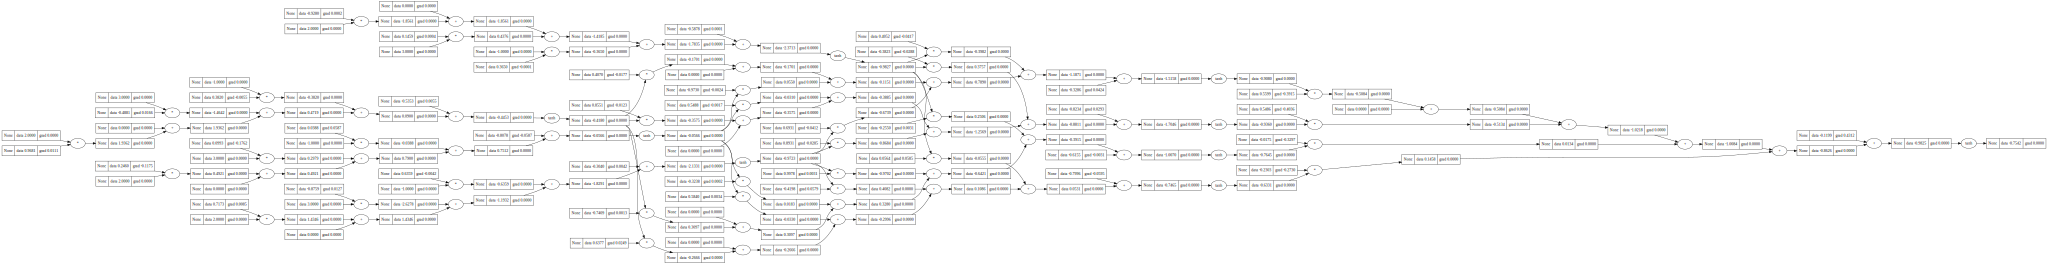

In [95]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

my_nn = MultiLayer(3 ,[4,4,1])


draw_dot(my_nn(xs[0])[0])
my_nn(xs[0])[0].backward()
draw_dot(my_nn(xs[0])[0])


In [ ]:

alpha = 0.01
for k in range(2):
    # forward pass
    y_pred = [my_nn(x)[0] for x in xs]
    loss = sum([(yp - yt) ** 2 for yt, yp in zip(ys, y_pred)])
    print(y_pred)

    # draw_dot(loss)
    for p in my_nn.parameters():
        p.grad = 0.0
    
    # backward pass
    loss.backward()
    
    # print(my_nn.parameters())
    for p in my_nn.parameters():
        p.data -= alpha * p.grad
    
    # if k % 10 == 0:
    print(f'Epoch {k} : Loss {loss.data}')



In [103]:
from graphviz import Digraph

# def trace(root):
#   return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  # nodes, edges = trace(root)
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n.opr:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n.opr, label = n.opr)
      # and connect this node to it
      dot.edge(uid + n.opr, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2.opr)

  return dot


## import the module and run

In [104]:
import simpleGrad
import numpy as np

In [105]:
x = [2.0, 3.0, -1.0]
nn = simpleGrad.MultiLayerPerceptron(3, [4, 4, 1])
y = nn(x)
y

Val(d=0.9452916028979235, opr='tanh')

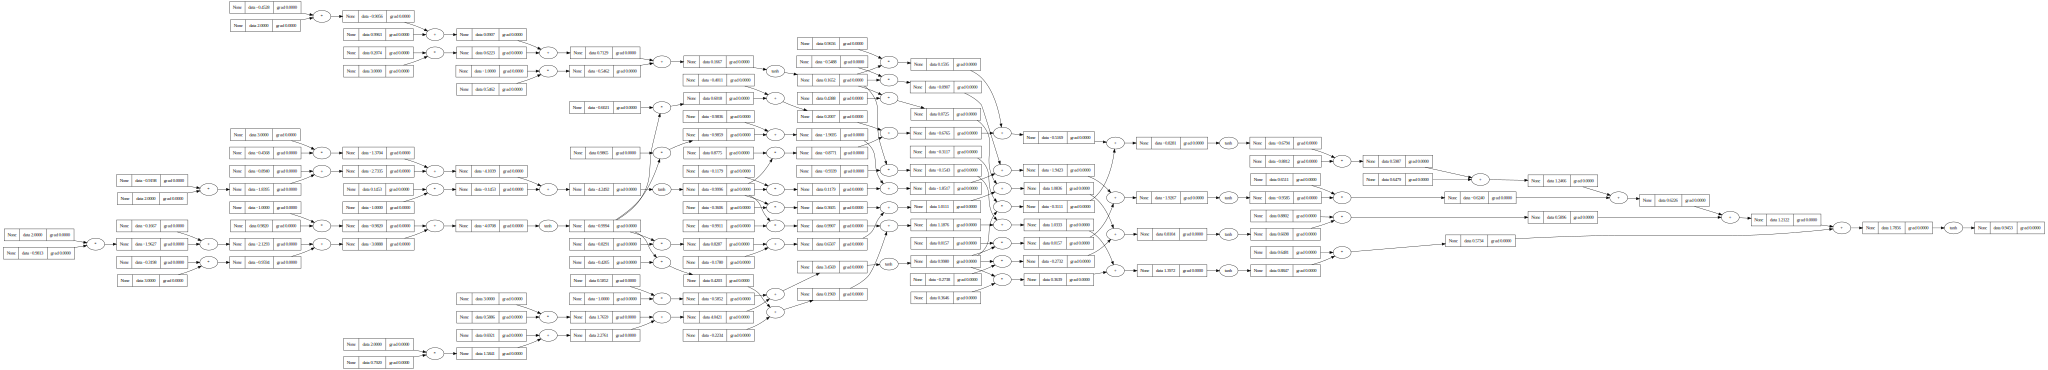

In [106]:
# draw_dot(y)

In [107]:
y.backward()

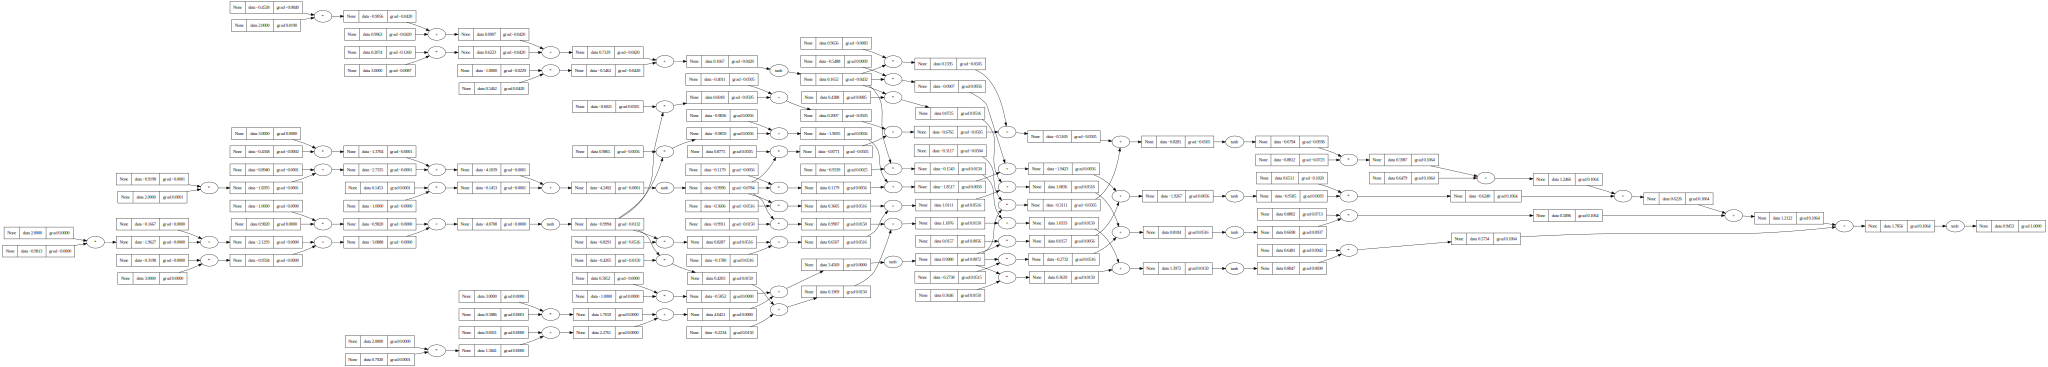

In [108]:
draw_dot(y)

In [118]:
from simpleGrad import MultiLayerPerceptron

xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

x = [2.0, 3.0, -1.0]
n = MultiLayerPerceptron(3, [4, 4, 1])
n(x)

for k in range(20):
  
  # forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
  
  # backward pass
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()
  
  # update
  for p in n.parameters():
    p.data += -0.1 * p.grad
  
  print(k, loss.data)


Val(d=0.06928104127848232, opr='tanh')

0 4.672879772458646
1 4.472576150556891
2 4.235374691299991
3 3.8340299805898135
4 2.6032839539746937
5 1.995562156078345
6 2.289945403501308
7 0.6075563637253898
8 0.43781375626372504
9 0.026244170649045218
10 0.022174128571611964
11 0.019354060973645365
12 0.0172730923557899
13 0.015666537332363544
14 0.014383188659328888
15 0.013330288494436855
16 0.012447741984557455
17 0.011694889448835222
18 0.011043228427040155
19 0.010472178527078619


### simple classification problem

((16, 2), (16,), (4, 2), (4,))

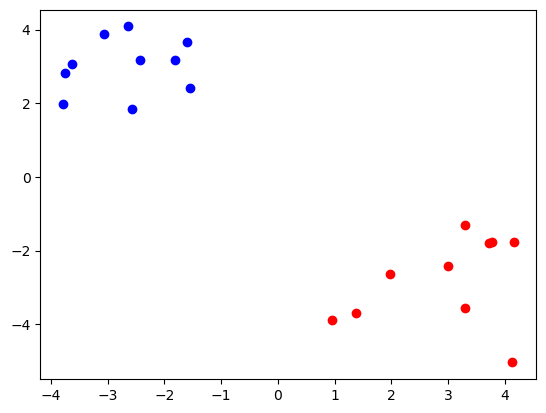

In [113]:
n = 10
d = 2
ranges = 3
postives = np.random.randn(n, d) + np.array([ranges, -ranges])
negatives = np.random.randn(n, d) + np.array([-ranges, ranges])

if d == 2:
    plt.scatter(postives[:, 0], postives[:, 1], color='red')
    plt.scatter(negatives[:, 0], negatives[:, 1], color='blue')

postives = np.column_stack((postives, np.ones(n)))
negatives = np.column_stack((negatives, np.zeros(n)))

data = np.vstack((postives, negatives))
np.random.shuffle(data)

X, y = data[:, :-1], data[:, -1] 
train_size = int(2*n*0.8)
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [158]:
nn = simpleGrad.MultiLayerPerceptron(2, [4, 4, 1])
alpha = 0.1

X_train[0]
nn(X_train[0])


array([ 1.98590062, -2.6253607 ])

Val(d=0.01083812375246235, opr='tanh')

In [160]:
alpha = 0.1
prev_loss = float('inf')
for k in range(1000):
    # forward pass
    ypred = [nn(x) for x in X_train]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(y_train, ypred))
    # backward pass
    for p in nn.parameters():
        p.grad = 0.0
    loss.backward()

    # update
    if alpha > 0.001:
        alpha = alpha * 0.99
    for p in nn.parameters():
        p.data += -alpha * p.grad
    
    # convergence
    if np.linalg.norm(prev_loss - loss.data) < 1e-6:
        print(f'Converged at epoch {k}')
        break

    if k % 10 == 0:
        print(f'{k:3}:{loss.data:.4f}')
    prev_loss = loss.data

  0:0.3051
 10:7.4468
 20:7.3626
 30:1.4469
 40:2.4732
 50:2.4996
 60:2.2355
 70:1.7026
 80:1.1484
 90:0.5948
100:0.1471
110:0.0040
120:0.0002
Converged at epoch 122


In [161]:
y_pred = [nn(x) for x in X_test]

In [169]:
for i,j in zip(y_test,y_pred):
    print(f'{i} : {j.data:.6f} -> ~ {int(j.data > 0.5)}')

1.0 : 0.999416 -> ~ 1
1.0 : 0.999405 -> ~ 1
0.0 : -0.003316 -> ~ 0
1.0 : 0.999426 -> ~ 1


## Bigger Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

((160, 2), (160,), (40, 2), (40,))

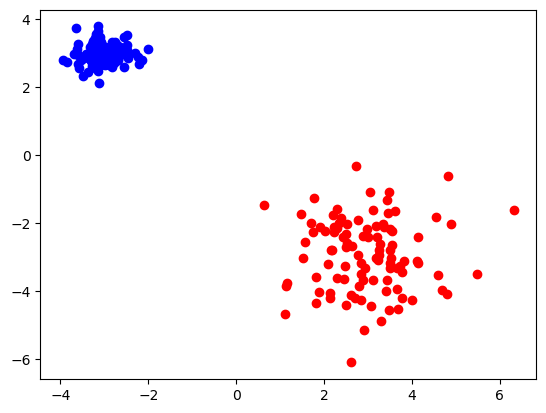

In [12]:
n = 100
d = 2
ranges = 3
postives = np.random.randn(n, d) * np.random.randn() + np.array([ranges, -ranges])
negatives = np.random.randn(n, d) * np.random.randn() + np.array([-ranges, ranges])

if d == 2:
    plt.scatter(postives[:, 0], postives[:, 1], color='red')
    plt.scatter(negatives[:, 0], negatives[:, 1], color='blue')

postives = np.column_stack((postives, np.ones(n)))
negatives = np.column_stack((negatives, np.zeros(n)))

data = np.vstack((postives, negatives))
np.random.shuffle(data)

X, y = data[:, :-1], data[:, -1] 
train_size = int(2*n*0.8)
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

### with my implementation

In [19]:
def SGD_with_NN(nn, X_train, y_train, max_iters = 1000, alpha = 0.1, decay_rate = 0.99, mini_alpha = 0.001, epsilon = 1e-6):
    prev_loss = float('inf')
    for k in range(max_iters):
        # forward pass
        ypred = [nn(x) for x in X_train]

        noise = np.random.randn().real

        loss = sum((yout - ygt)**2 for ygt, yout in zip(y_train, ypred)) + noise
        
        # backward pass
        for p in nn.parameters():
            p.grad = 0.0
        loss.backward()

        # update
        if alpha > mini_alpha:
            alpha = alpha * decay_rate
        for p in nn.parameters():
            p.data += -alpha * p.grad
        
        # # convergence
        # if run_np.linalg.norm(prev_loss - loss.data) < epsilon:
        #     print(f'Converged at epoch {k} , prev_loss = {prev_loss} , loss = {loss.data}')
        #     break

        if k % 10 == 0:
            print(f'{k:3}:{loss.data:.4f}')

        prev_loss = loss.data
    return nn


In [22]:
from simpleGrad import MultiLayerPerceptron

nn = MultiLayerPerceptron(2, [8, 8, 1])
nn

MLP([Layer([Neuron(w = [Val(d=0.4282952049392519), Val(d=0.5642316369925313)] , b = Val(d=0.28356248569273146)), Neuron(w = [Val(d=0.3281102472950215), Val(d=-0.23775095519230316)] , b = Val(d=0.5857296399330472)), Neuron(w = [Val(d=0.32969141213705), Val(d=-0.3716978296274944)] , b = Val(d=0.7727166252980668)), Neuron(w = [Val(d=-0.5689969773035968), Val(d=-0.724056511114394)] , b = Val(d=-0.9953001247811972)), Neuron(w = [Val(d=-0.1588769123373024), Val(d=0.5841941483456277)] , b = Val(d=-0.5447220277391842)), Neuron(w = [Val(d=-0.5052847061032408), Val(d=0.6251116734916973)] , b = Val(d=-0.3690694199299893)), Neuron(w = [Val(d=-0.8678812912639535), Val(d=-0.7594636882203514)] , b = Val(d=0.4665613089658929)), Neuron(w = [Val(d=-0.4441435908759135), Val(d=-0.24274714456484014)] , b = Val(d=-0.26119138511856343))]), Layer([Neuron(w = [Val(d=-0.641324403692844), Val(d=0.6839193204207343), Val(d=0.23949961725317603), Val(d=-0.03897569915472121), Val(d=0.9207279085034801), Val(d=-0.74626

In [23]:
nn = SGD_with_NN(nn, X_train, y_train,max_iters=100)
y_pred = [nn(x) for x in X_test]
for i, j in zip(y_test[:10], y_pred[:10]):
    print(f'{int(i)} ~ {int(j.data > 0.5)}  <<   {j.data:.6f}')

  0:275.9129
 10:79.8490
 20:78.0696
 30:79.3928
 40:77.6405
 50:77.7305
 60:78.1138
 70:78.7537
 80:78.2693
 90:79.1704
1 ~ 1  <<   1.000000
0 ~ 0  <<   -1.000000
1 ~ 1  <<   1.000000
0 ~ 0  <<   -1.000000
0 ~ 0  <<   -1.000000
1 ~ 1  <<   1.000000
0 ~ 0  <<   -1.000000
1 ~ 1  <<   1.000000
0 ~ 0  <<   -1.000000
1 ~ 1  <<   1.000000


### With Pytorch

In [37]:
import torch

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

X_train.requires_grad = True
y_train.requires_grad = True
X_test.requires_grad = True
y_test.requires_grad = True

from torch import nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 4)
        self.fc3 = nn.Linear(4, 1)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

net = Net()
net

C:\Users\myalla\AppData\Local\Temp\ipykernel_23240\3850262635.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
C:\Users\myalla\AppData\Local\Temp\ipykernel_23240\3850262635.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32)
C:\Users\myalla\AppData\Local\Temp\ipykernel_23240\3850262635.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
C:\Users\myalla\AppData\Local\Temp\ipykernel_

Net(
  (fc1): Linear(in_features=2, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=4, bias=True)
  (fc3): Linear(in_features=4, out_features=1, bias=True)
)

In [39]:
test1 = net(X_train[0])
test1

tensor([0.5561], grad_fn=<SigmoidBackward0>)

In [46]:
test1.data.item() , type(test1)

(0.5561475157737732, torch.Tensor)

In [52]:
def SGD_with_NN(nn, X_train, y_train, max_iters = 1000, alpha = 0.1, decay_rate = 0.99, mini_alpha = 0.001, epsilon = 1e-6):
    prev_loss = float('inf')
    for k in range(max_iters):
        # forward pass
        ypred = [nn(x) for x in X_train]

        noise = np.random.randn().real

        loss = sum((yout - ygt)**2 for ygt, yout in zip(y_train, ypred)) + noise
        
        # backward pass
        for p in nn.parameters():
            p.grad = None
        loss.backward()

        # update
        if alpha > mini_alpha:
            alpha = alpha * decay_rate
        for p in nn.parameters():
            p.data += -alpha * p.grad
        
        # # convergence
        # if run_np.linalg.norm(prev_loss - loss.data) < epsilon:
        #     print(f'Converged at epoch {k} , prev_loss = {prev_loss} , loss = {loss.data}')
        #     break

        if k % 10 == 0:
            print(f'{k:3}:{loss.data.item():.4f}')

        prev_loss = loss.data
    return nn


In [53]:
SGD_with_NN(net, X_train, y_train, max_iters=100)

  0:0.0862
 10:-1.1995
 20:-2.0661
 30:-1.4000
 40:-0.8331
 50:0.6863
 60:-0.0777
 70:-0.6400
 80:1.5529
 90:0.5758


Net(
  (fc1): Linear(in_features=2, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=4, bias=True)
  (fc3): Linear(in_features=4, out_features=1, bias=True)
)

In [56]:
y_pred = [net(x) for x in X_test]
for i, j in zip(y_test[:10], y_pred[:10]):
    print(f'{int(i)} ~ {int(j.data.item() > 0.5)}  <<   {j.data.item():.6f}')

1 ~ 1  <<   0.999982
0 ~ 0  <<   0.000010
1 ~ 1  <<   0.999992
0 ~ 0  <<   0.000006
0 ~ 0  <<   0.000011
1 ~ 1  <<   0.999862
0 ~ 0  <<   0.000022
1 ~ 1  <<   0.999941
0 ~ 0  <<   0.000011
1 ~ 1  <<   0.999970


In [61]:
SGD_with_NN(net, X_train, y_train, max_iters=50)

  0:1.6056
 10:0.8744
 20:0.4512
 30:0.6865
 40:0.9615


Net(
  (fc1): Linear(in_features=2, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=4, bias=True)
  (fc3): Linear(in_features=4, out_features=1, bias=True)
)

In [62]:
y_pred = [net(x) for x in X_test]
for i, j in zip(y_test[:10], y_pred[:10]):
    print(f'{int(i)} ~ {round(j.data.item())}  <<   {j.data.item():.6f}')

1 ~ 1  <<   0.999988
0 ~ 0  <<   0.000010
1 ~ 1  <<   0.999995
0 ~ 0  <<   0.000006
0 ~ 0  <<   0.000011
1 ~ 1  <<   0.999902
0 ~ 0  <<   0.000023
1 ~ 1  <<   0.999958
0 ~ 0  <<   0.000011
1 ~ 1  <<   0.999979
